In [18]:
from math import *
from numpy import *
from scipy import *
from scipy.integrate import *
from pylab import *
from matplotlib import animation
from JSAnimation import IPython_display
%matplotlib inline

Comenzaremos por utilizar la función <tt>**quad**</tt> que integra una función <tt>**func**</tt> dados los límites de integrción superior e inferior <tt>**a**</tt> y <tt>**b**</tt> respectivamente, es decir: <tt>  **quad(func, a, b)**</tt>, comencemos por integrar la función $sin(x)$,  de $0$  a $\frac{\pi}{2}$,es decir $\displaystyle \int ^{\dfrac{\pi}{2}} _{0}  \sin(x) dx$

In [2]:
a=quad(sin,0,pi/2)
type(a)
## Integramos la función sin de 0 a pi/2

tuple

Observamos que la salidad de <tt>**quad**</tt> es una tupla donde el primer termino es el valor aproximado de la integral y el segundo elemento de la tupla es una estimación del error absoluto en el resultado. Ahora veamos como integrar la función $A\sin(x) + b$ donde A y b son constantes para esto definamos la siguiente función 

In [3]:
def Asin(x,a,b): # Definimos Asin cuyos argumentos son los puntos de evaluación y las contantes
    return a*sin(x) + b # El seno es multiuplicado por a y luego se le suma b

Observamos que la función anterior tiene dos argumentos extras además de los valores de evaluación, estos se pasas a <tt>**quad**</tt> como una tupla con la siguiente sintaxis <tt>  **quad(func, a, b, args=())**</tt>, es decir:


In [4]:
quad(Asin,0,pi/2,args=(2,3)) # En este caso a = 2 y  b = 3

(6.712388980384689, 7.45224879626326e-14)

Ahora integremos la función $e^{-x}$, es decir $\displaystyle \int _{0} ^{\infty} e^{-x} dx$ la cual es igual a $1$

In [5]:
invexp = lambda x: exp(-x) ## lambda es un breve constructor de funciones
quad(invexp, 0, inf)       ## Se integra exp(-x)

(1.0000000000000002, 5.842606742906004e-11)

<tt>**quad**</tt> tiene más funciones la cuales se pueden revisar en http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad

La paquetería <tt>scipy.integrate</tt> tiene otros métodos de integración en particular una la función que integra un sistema de ecuaciones diferencales (lo que eso tenga decir) dicha función se llama <tt>**odeint**</tt>, cuya sintaxis es
<tt>**odeint(func, y0, t, args=())**</tt> donde:

- <tt>**func:**</tt> Función que depende de <tt>t</tt> y <tt>y</tt>. Calcula la derivada de <tt>y</tt> en <tt>t0</tt>.
- <tt>**y0:**</tt> Array. Condición inicial sobre <tt>y</tt>.
- <tt>**t:**</tt> Array. Una secuencia de puntos de tiempo para que resolver y. El punto de valor inicial debe ser el primer elemento de esta secuencia.
- <tt>**args=():**</tt> Tupla. Argumentos extra para pasar a la función.

## Tiro parabólico en dos dimensiones 

Un tiro parabólico con rozamiento en dos dimensiones. De la segunda ley de Newton tememos que $\vec{F}=m\ddot{\vec{r}}$, un módelo que se propone para el rozamiento en pensar que este en se opone a la velociadad, es decir $\vec{F}_{f}=-\kappa\dot{\vec{r}}$ t además también sabemos que sobre la masa actua la fuerza de atracción gravitacional $\vec{F}_{g}=-mg\hat{j}$. Por tanto $\vec{F}=\vec{F}_{f}+\vec{F}_{g} = (-\kappa\dot{x})\hat{i}+(-\kappa\dot{y}-mg)\hat{j} = m\ddot{x}\hat{i} + m\ddot{y}\hat{j}$. Por tanto se tiene


\begin{eqnarray}
m\ddot{x}=-\kappa\dot{x} \\
m\ddot{y}=-\kappa\dot{y}-mg
\end{eqnarray}
Si hacemos el cambio de variable

\begin{eqnarray}
v_{x}= \dot{x} & &
\dot{v}_x=-\alpha\dot{x} \\
v_{y}= \dot{y} & &
\dot{v}_y=-\alpha\dot{y}-g
\end{eqnarray}

Donde $\alpha = \dfrac{\kappa}{m}$ y cuya solución analitica es:
\begin{eqnarray}
x(t)= \dfrac{U}{\kappa} \left( 1 - e^{-\kappa t}\right) \\
y(t)= -\dfrac{gt}{\kappa}+\dfrac{\kappa V + g}{\kappa^2} \left( 1 - e^{-\kappa t}\right)
\end{eqnarray}
Con $U=\dot{x}(t_0)$ y $V=\dot{y}(t_0)$

In [27]:
def campo(ent,t,g,coef): # ent es una lista de la posición y velociad. ent = x0,y0,vx0,vy0 
                     # coef es el coeficiente de fricción 
        vx= ent[2]-.1
        vx_dot=-coef*ent[2]
        vy= ent[3]
        vy_dot=-coef*ent[3]-g
        return vx,vy,vx_dot,vy_dot
    

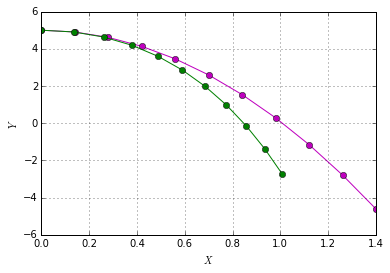

In [7]:
t = linspace(0,1.4,11)
ent0 =[0,5,1,0]
salida_ideal = odeint(campo,ent0,t,args=(9.81,0))
#print salida_ideal
salida_f = odeint(campo,ent0,t,args=(9.81,0.5))
x_ideal,y_ideal=salida_ideal[:,0],salida_ideal[:,1]
x_f,y_f=salida_f[:,0],salida_f[:,1]
plot(x_ideal,y_ideal,"o-",color="m")
plot(x_f,y_f,"o-",color="g")
xlabel("$X$")
ylabel("$Y$")
grid(True)

In [8]:
def rebote(argumentos,punto,dt):
    tiempo = array([0,dt/2,dt])
    sol = odeint(campo,punto,tiempo,args=(argumentos))
    while sol[0][1] > 1e-5:        
        if sol[0][1]*sol[1][1] < 0:
            tiempo = 0.5*tiempo
            sol = odeint(campo,sol[0],tiempo,args=(argumentos))        
            #print "aqui"
        else:
            tiempo = 0.5*tiempo
            sol = odeint(campo,sol[1],tiempo,args=(argumentos))        
            #print "aca"
    sol[0][3] = -sol[0][3]
    return list(sol[0])

In [9]:
def lanzar_pelota(inicio,argumentos,tmax_dt):
    x,y = [inicio[0]],[inicio[1]]
    tiempo = [0,tmax_dt[1]]
    while tiempo[0] <= tmax_dt[0]:
        sol = odeint(campo,inicio,tiempo,args=(argumentos))
        if sol[0][1]*sol[1][1] < 0:
            sol = rebote(argumentos,sol[0],tmax_dt[1])
            inicio = sol
            x.append(sol[0])
            y.append(sol[1])
        else:
            x.append(sol[1][0])
            y.append(sol[1][1])
            inicio = sol[1]
        tiempo = [tiempo[1],tiempo[1]+tmax_dt[1]]
    return x,y

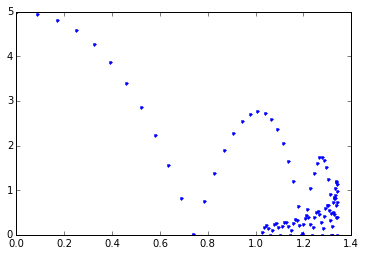

In [30]:
x,y = lanzar_pelota(ent0,(9.81,0.5),[10,0.1])
plot(x,y,".")


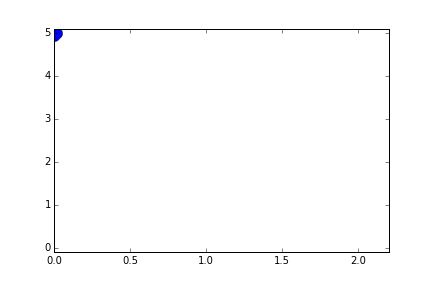
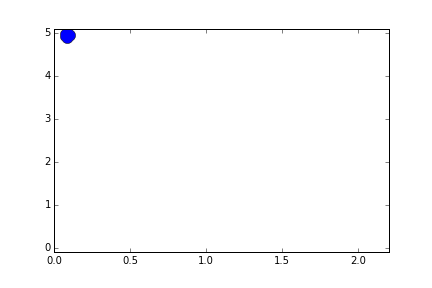
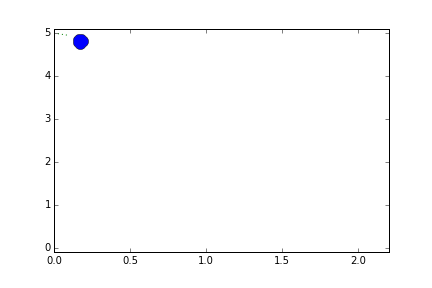
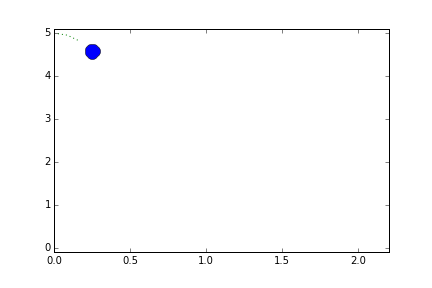
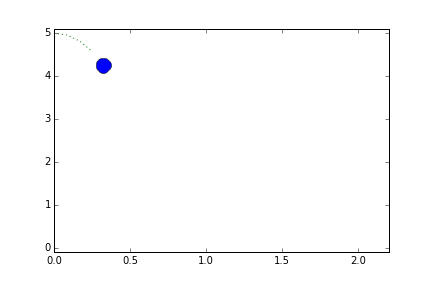
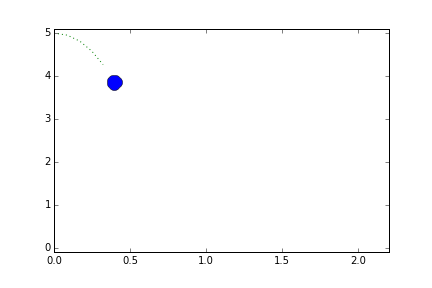
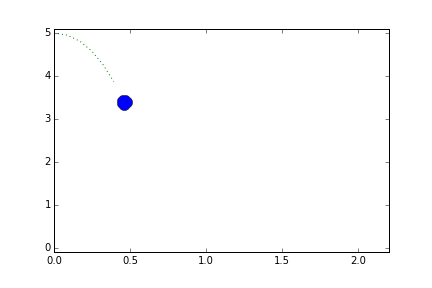
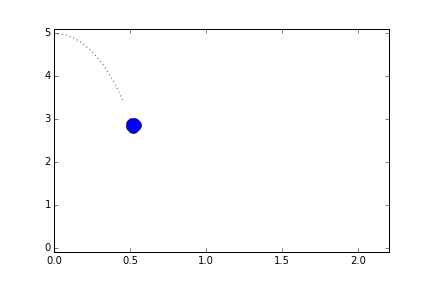
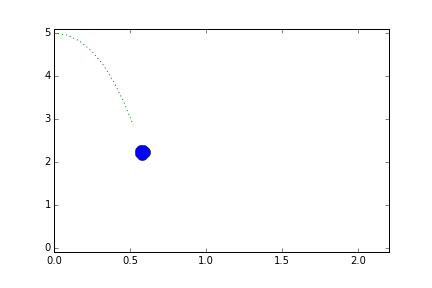
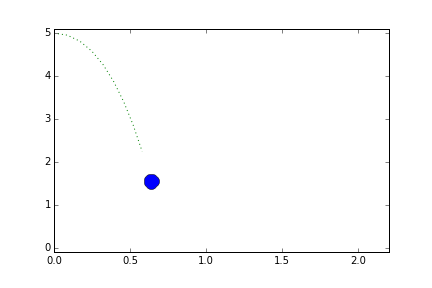
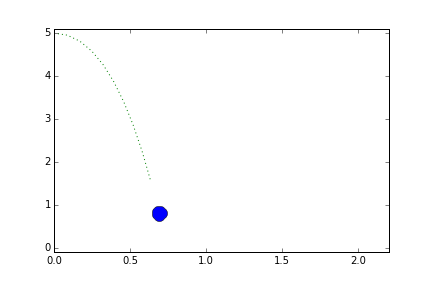
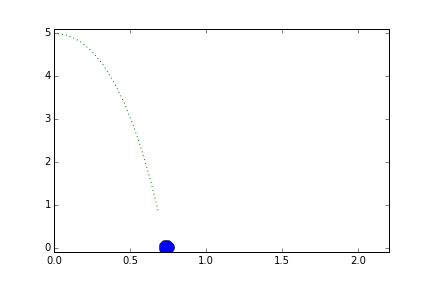
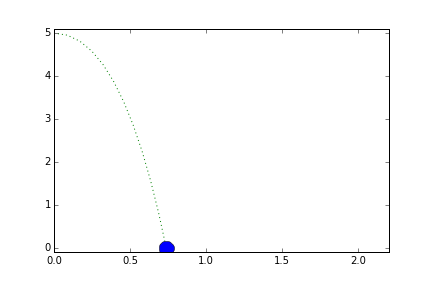
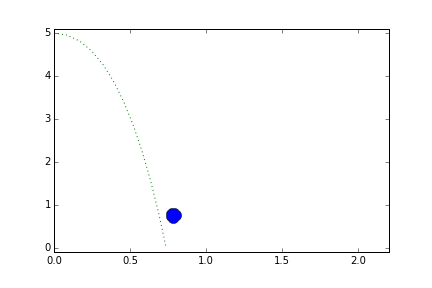
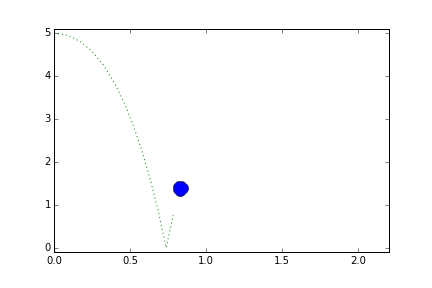
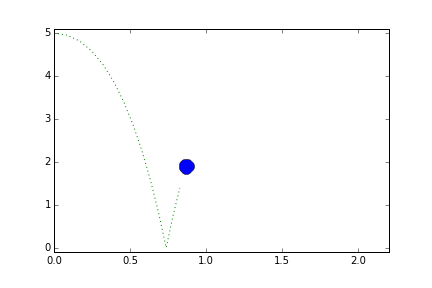
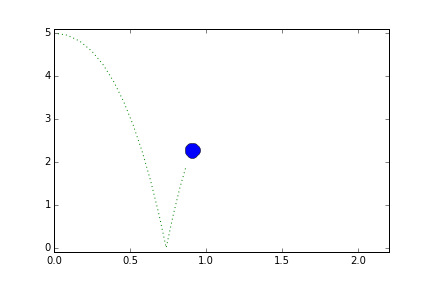
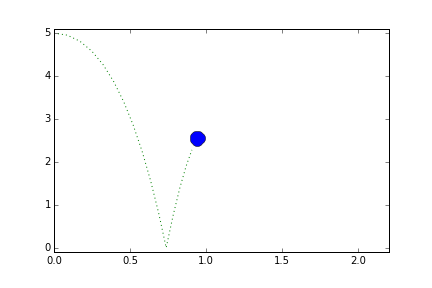
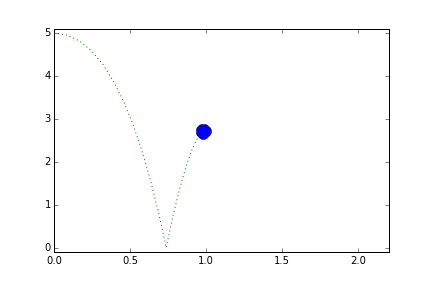
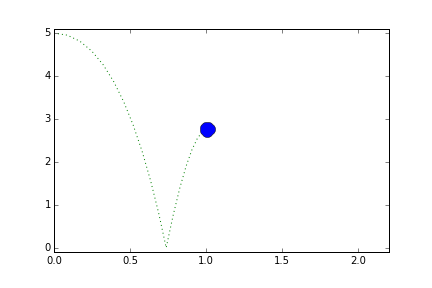
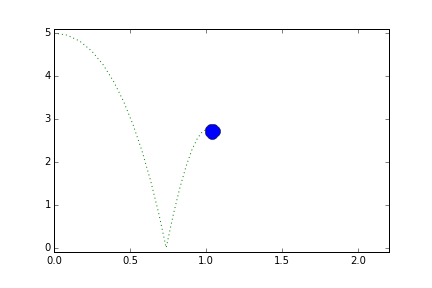
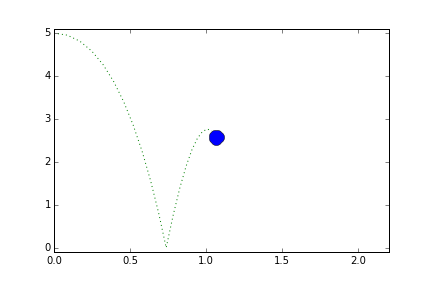
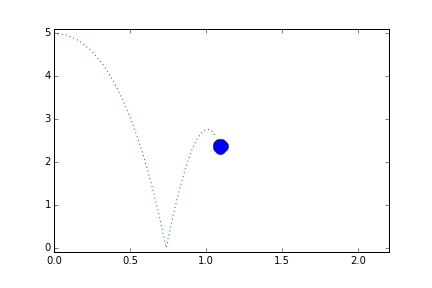
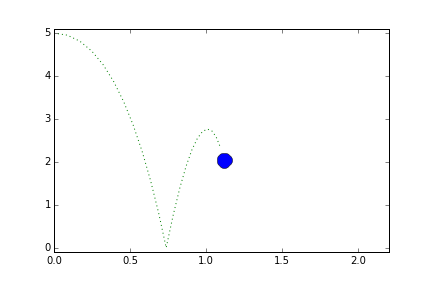
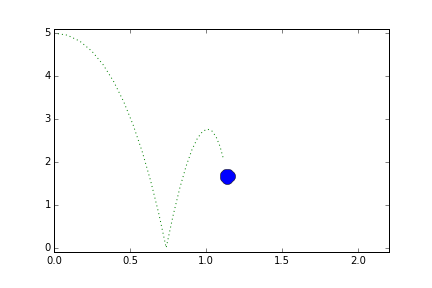
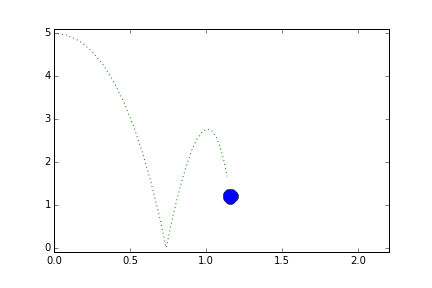
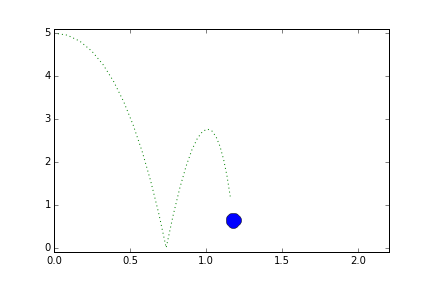
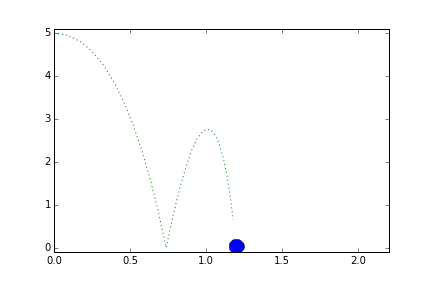
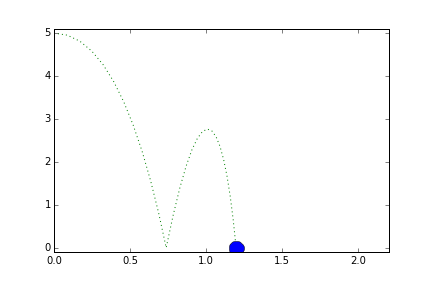
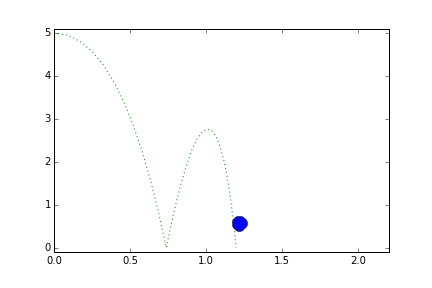
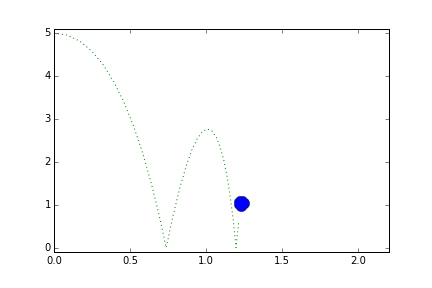
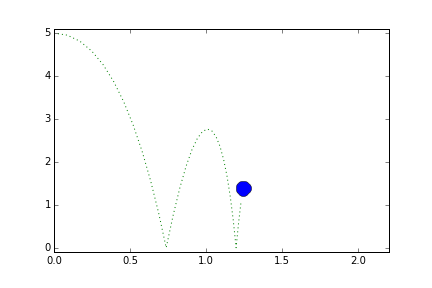
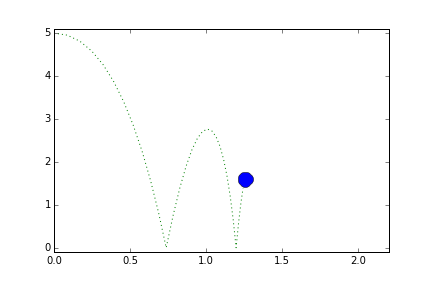
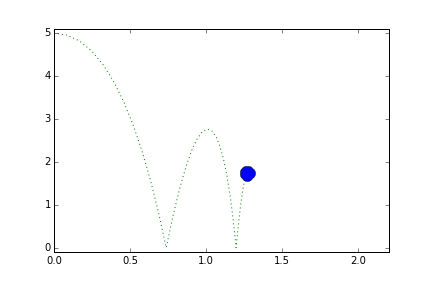
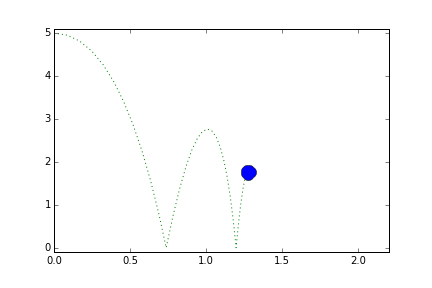
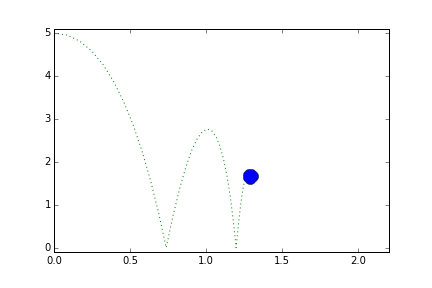
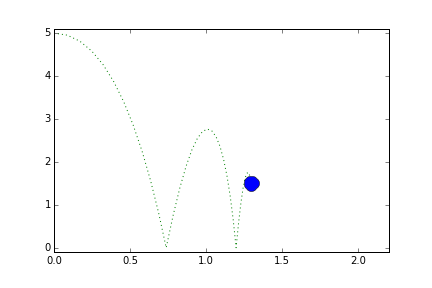
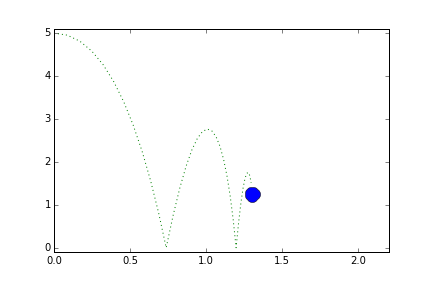
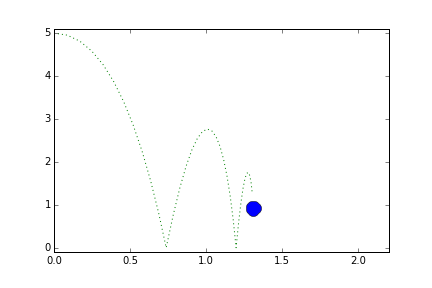
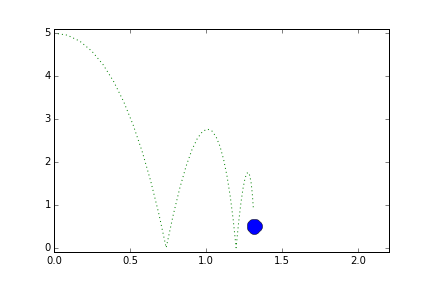
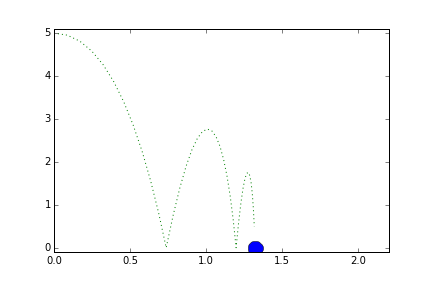
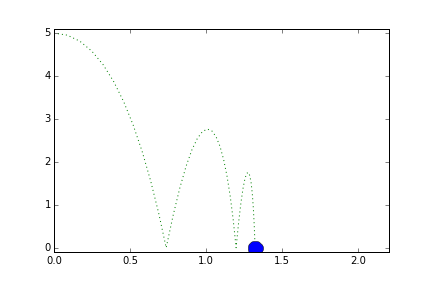
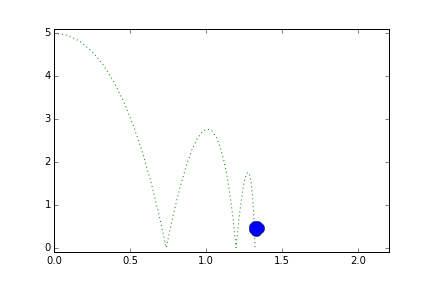
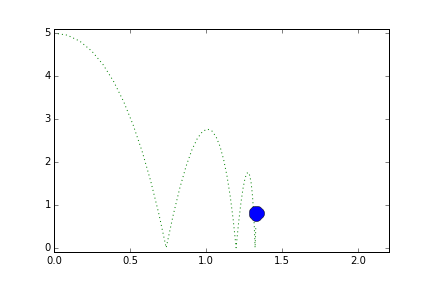
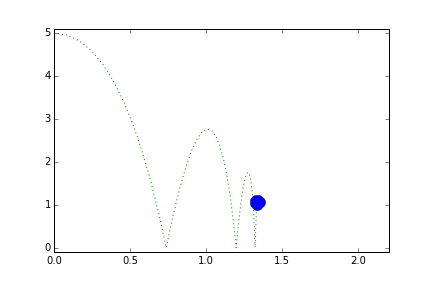
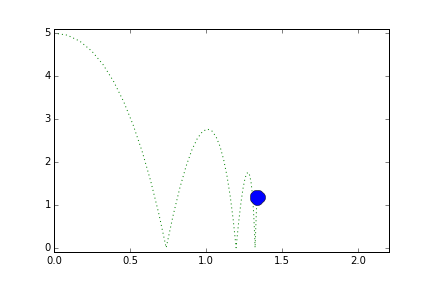
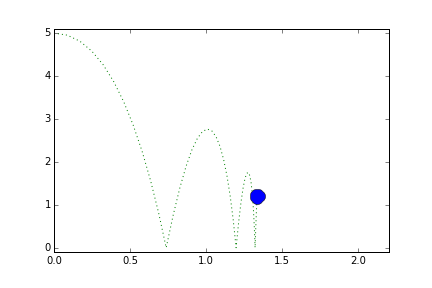
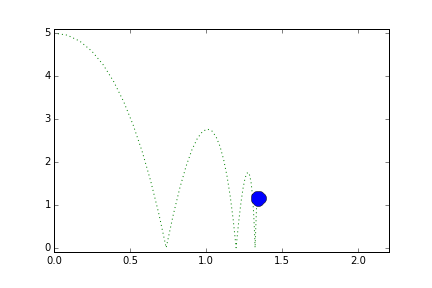
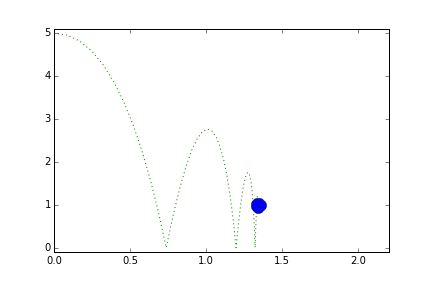
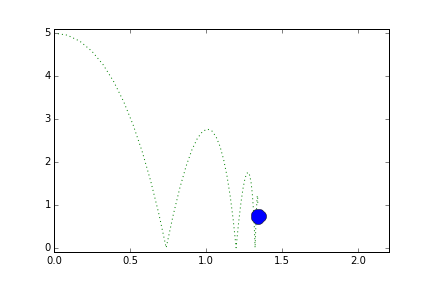
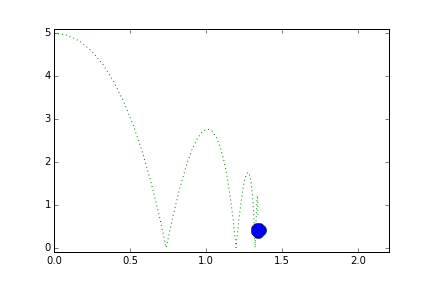
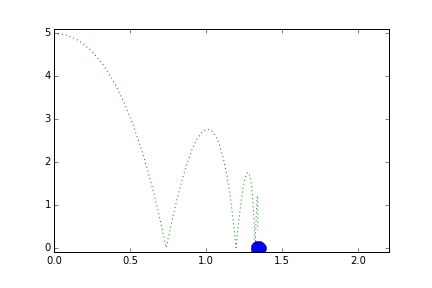
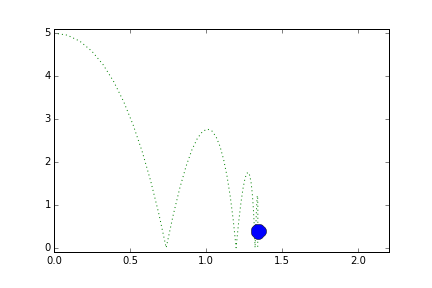
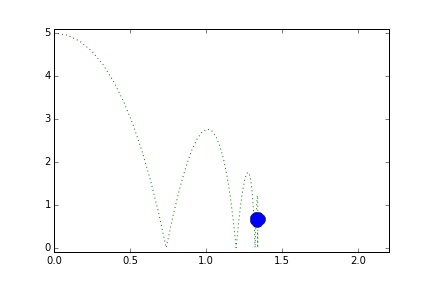
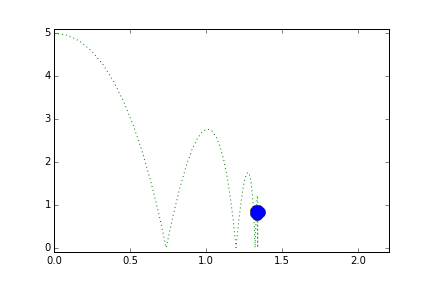
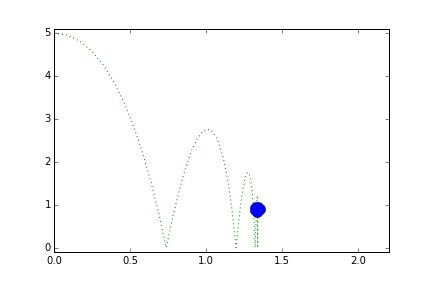
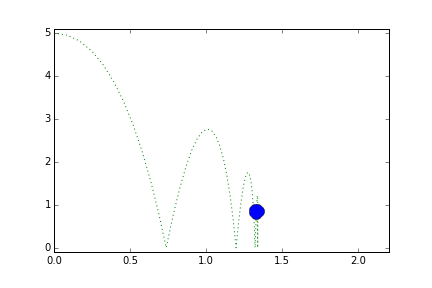
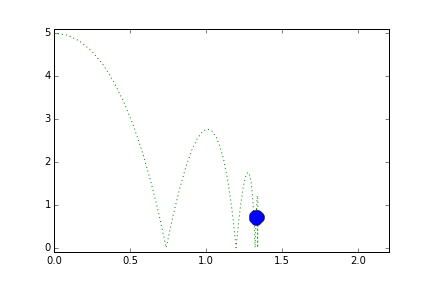
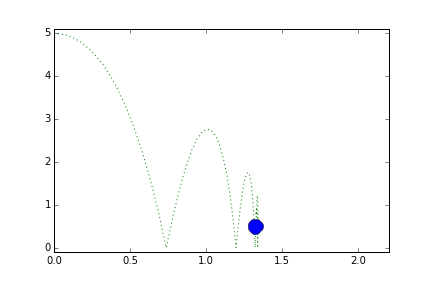
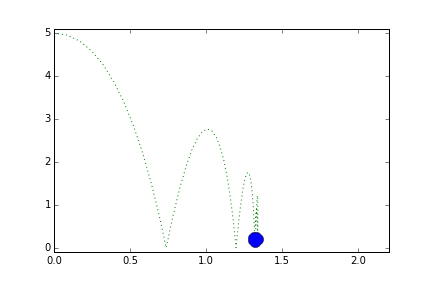
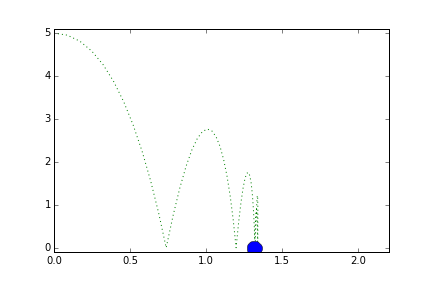
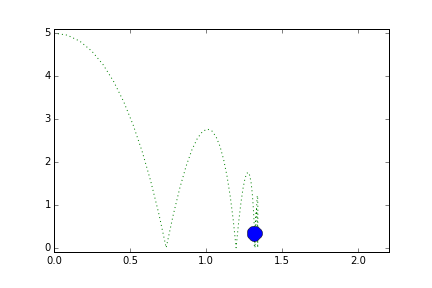
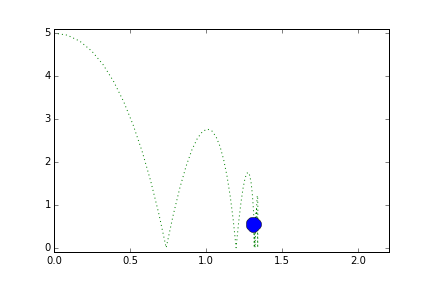
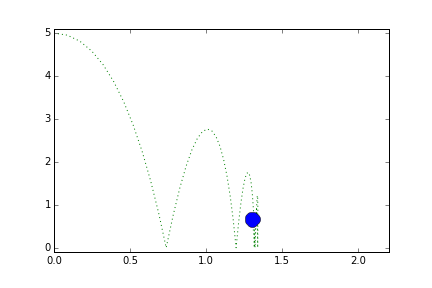
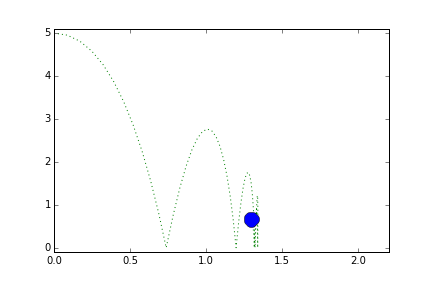
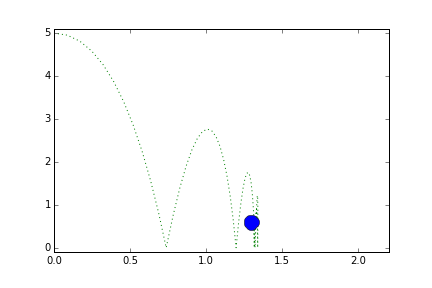
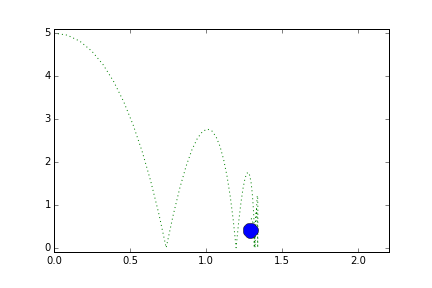
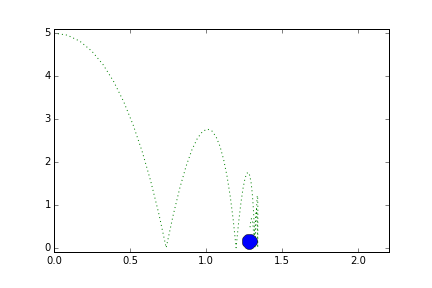
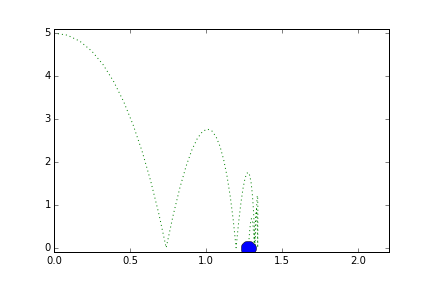
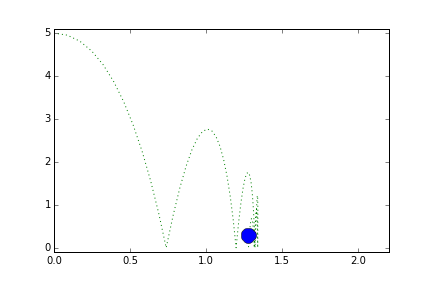
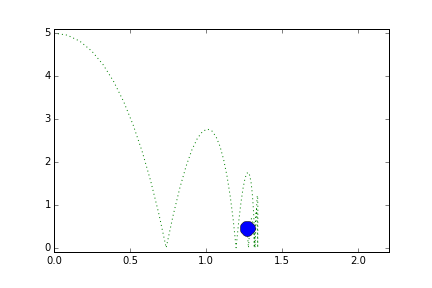
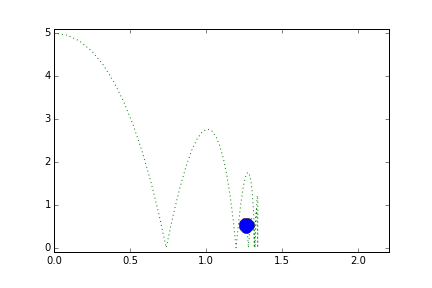
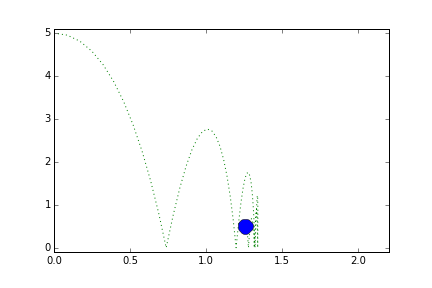
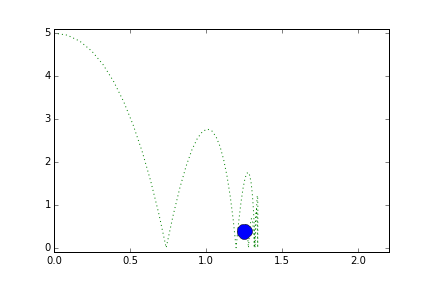
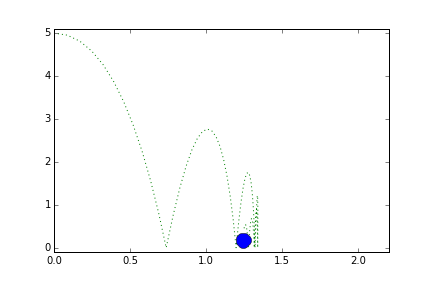
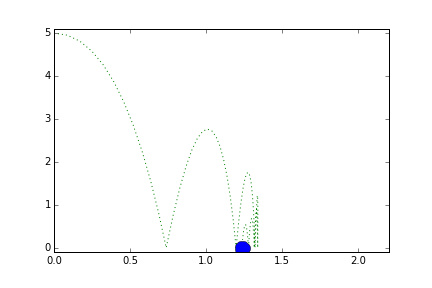
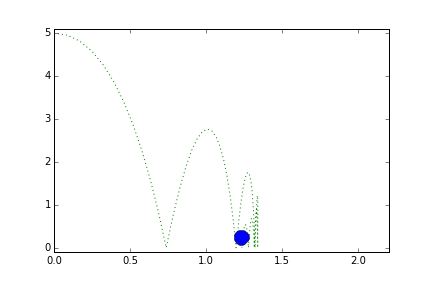
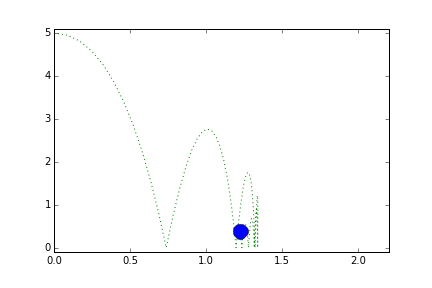
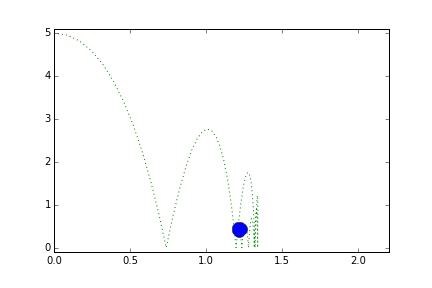
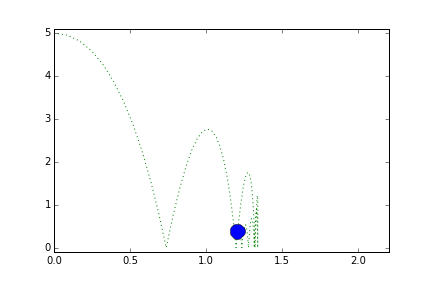
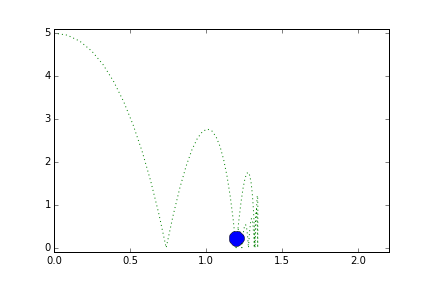
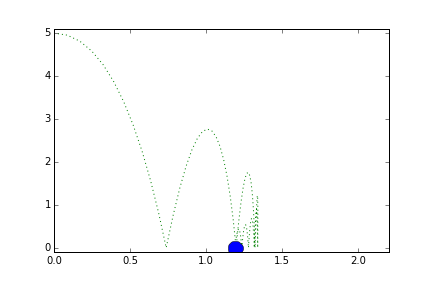
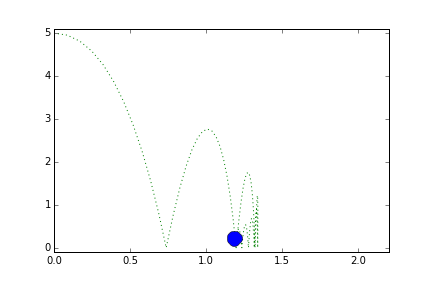
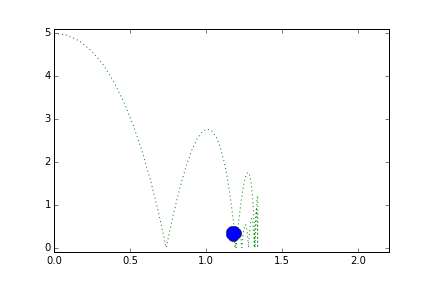
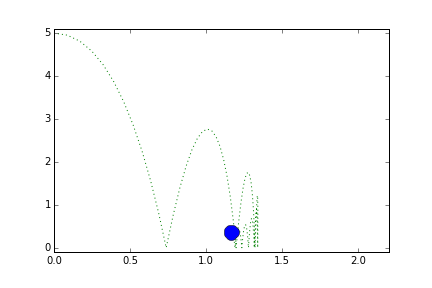
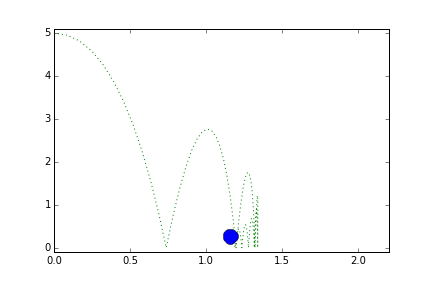
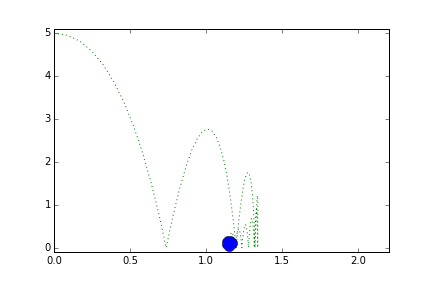
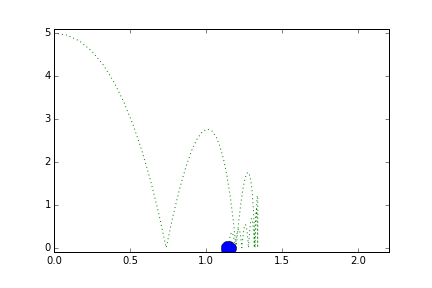
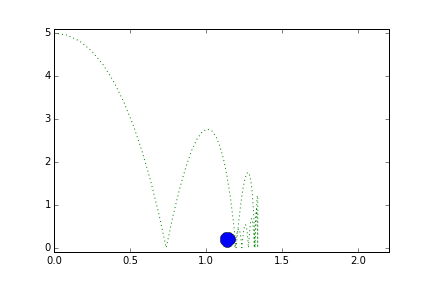
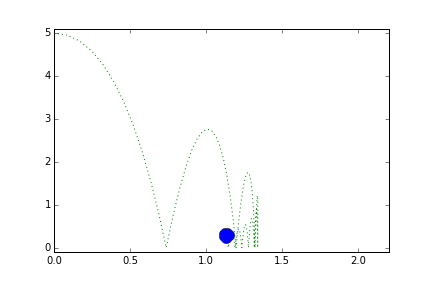
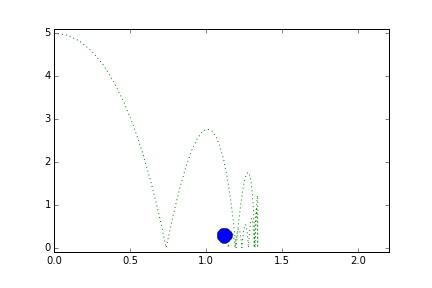
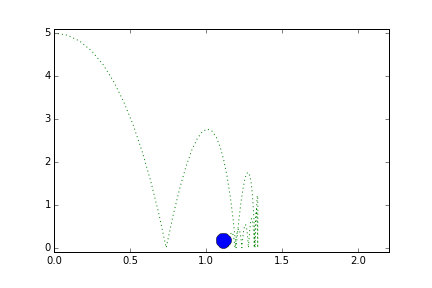
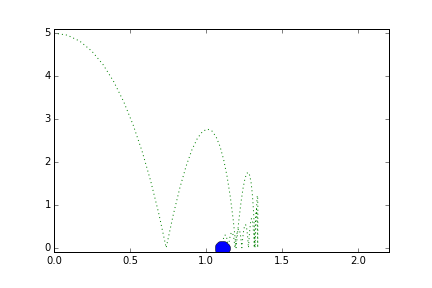
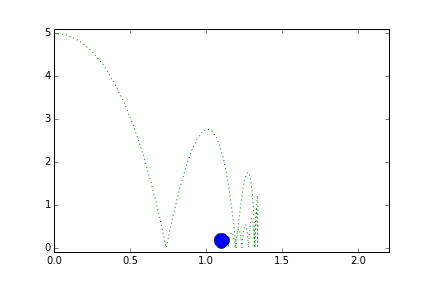
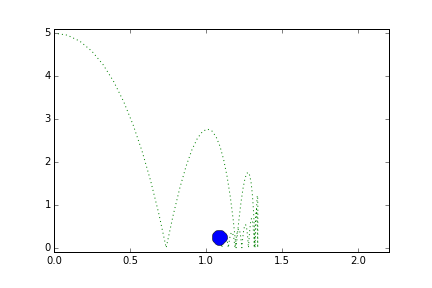
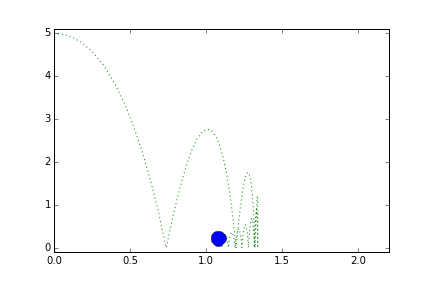
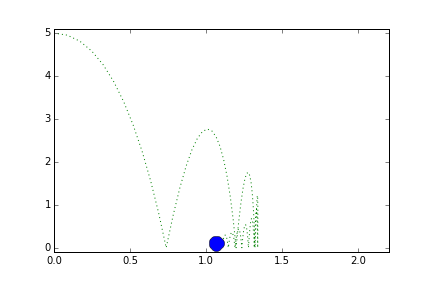
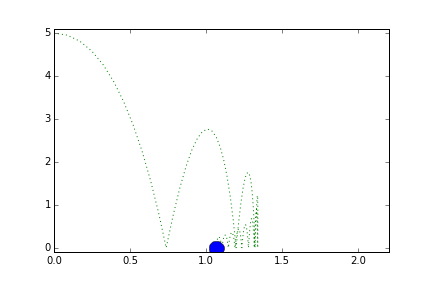
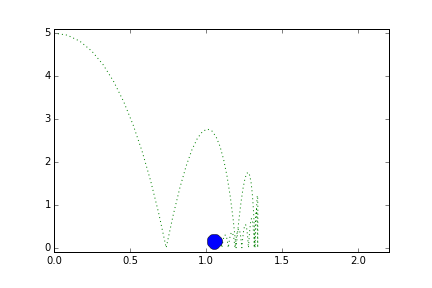
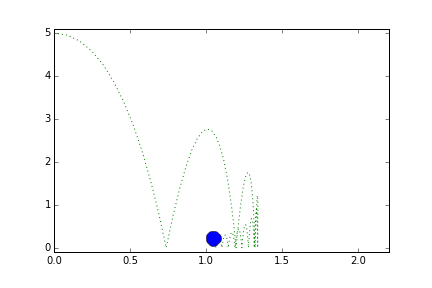
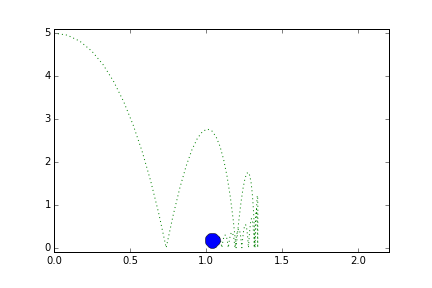
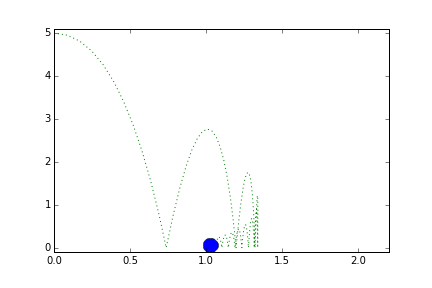

In [31]:
figura = figure()
ejes = axes(xlim=(0, 2.2), ylim=(-0.1, 5.1))
trayectoria, = ejes.plot([], [], ':',color='g')
pelota, = ejes.plot([], [], 'o',markersize=15)

def init():
    trayectoria.set_data([], [])
    pelota.set_data([], [])
    return trayectoria,pelota

def animate(i):
    trayectoria.set_data(x[:i], y[:i])
    pelota.set_data(x[i], y[i])
    return trayectoria,pelota

animation.FuncAnimation(figura, animate, init_func=init,
                        frames=len(x), interval=60)

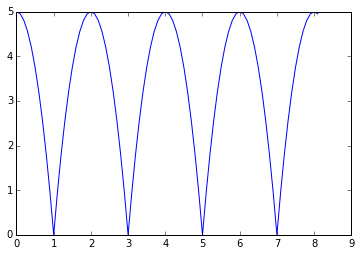

In [15]:
x,y = lanzar_pelota(ent0,(10,0),[8,0.1])
plot(x,y)